# Assignment 2 – “Image Classification”

## Redes Neuronais e Aprendizagem Profunda

### Miguel Silvério m55661 | Mestrado em Engenharia Informática
### Ricardo Dias 59196 | Mestrado em Inteligência Artificial e Ciência de Dados
### Évora 2023/2024


## Introduction

The goal of this project was to create a model capable of estimating the Aerosol Optical Thickness (AOT) at 550 nm for specific locations using Sentinel-2 satellite images. 
To accomplish this goal, we utilized machine learning techniques to deploy a model capable of analyzing the given images and then predict the closest values. 
This involved implementing a methodology to preprocess the data and train a model to accurately predict AOT values from the satellite images. 
Given the complexity and high-dimensional nature of the image data, we analyzed the available modeling architectures and ultimately decided on using a Convolutional Neural Network (CNN).

## Dataset Overview

The dataset consists of 5 files related to predicting Aerosol Optical Thickness (AOT) at 550 nm using Sentinel-2 imagery:

### Train Data
- **File:** Train
- **Instances:** 10439
- **Attributes:** 10 (9 numeric attributes, 1 file)
- **Description:** Training dataset for model development.

### Test Data
- **File:** Test
- **Instances:** 2713
- **Attributes:** 10 (9 numeric attributes, 1 file)
- **Description:** Testing dataset for evaluating model performance.

### Sample Submission (Random)
- **File:** Sample sub random
- **Instances:** 2713
- **Attributes:** 2 (2 numeric attributes)
- **Description:** Sample submission file format with random values.

### Sample Submission (Median)
- **File:** Sample sub median
- **Instances:** 2713
- **Attributes:** 2 (2 numeric attributes)
- **Description:** Sample submission file format with median values.

### Sample Submission (Mean)
- **File:** Sample sub mean
- **Instances:** 2713
- **Attributes:** 2 (2 numeric attributes)
- **Description:** Sample submission file format with median values.

## Experimental Set up

The first step in our experimental setup involves getting our data ready for analysis. We start by setting up the paths and loading the necessary CSV files to keep everything organized and easily accessible. For loading the images, we use a library called rasterio to read the .tif files. After loading the images, we normalize the data pixel value to 0 and 1 values. This step is crucial because it standardizes the inputs making the training process smoother and more efficient.


In [1]:
import tensorflow as tf

# Limitar GPU MEmory Consumption
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
#Find number of channels per image
import os
import rasterio

# Path to the TIFF file
tif_path = 'test/AgiaMarina_Xyliatou_35-038_33-0577_COPERNICUS_S2_20190114T083311_20190114T083309_T36SVD.tif'

# Check if the file exists
if os.path.exists(tif_path):
    print("File exists")
    
    # Open the TIFF file
    with rasterio.open(tif_path) as imagens:
        # Number of channels
        num_channels = imagens.count

    print(f"{num_channels} channels")
else:
    print("File does not exist")


File exists
13 channels


In [3]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import rasterio
from tensorflow.keras.preprocessing.image import img_to_array


# Directories containing images
train_image_dir = 'train'
test_image_dir = 'test'

# Load CSV files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Initialize lists to store training images and labels
x_train_images = []
y_train = []

print("Loading training images...")

# Loop through each row in the training DataFrame
for index, row in train_df.iterrows():
    nomeimg = row['file_name_l1']
    aot = row['value_550']
    if nomeimg.endswith('.tif'):  # Check if the file is a .tif image
        pathimagem = os.path.join(train_image_dir, nomeimg)  # Get the full path to the image
        y_train.append(aot)  # Append the AOT_550 value to the labels list

        # Load image
        with rasterio.open(pathimagem) as imagens:
            imagem = imagens.read(list(range(1, 14)))  # Reading all 13 bands
            imagem = np.moveaxis(imagem, 0, -1)  # Move the channel axis to the last position
            x_train_images.append(img_to_array(imagem))  # Convert the image to an array and append to the list

        # Print progress every 100 images
        if (index + 1) % 100 == 0:
            print(f"{index + 1} train images loaded")

# Convert lists to numpy arrays
x_train_images = np.array(x_train_images)  # Convert list of training images to numpy array
y_train = np.array(y_train)  # Convert list of labels to numpy array

# Normalize the image data
x_train_images = x_train_images / 255.0  # Normalize pixel values to the range [0, 1] to improve NN performance

print("Loading test images...")

# Initialize lists to store test images
x_test_images = []

# Loop through each row in the test DataFrame
for index, row in test_df.iterrows():
    nomeimg = row['file_name_l1']
    if nomeimg.endswith('.tif'):  # Check if the file is a .tif image
        pathimagem = os.path.join(test_image_dir, nomeimg)  # Get the full path to the image

        # Load image using Rasterio
        with rasterio.open(pathimagem) as imagens:
            imagem = imagens.read(list(range(1, 14)))  # Reading all 13 bands
            imagem = np.moveaxis(imagem, 0, -1)  # Move the channel axis to the last position
            x_test_images.append(img_to_array(imagem))  # Convert the image to an array and append to the list

        # Print progress every 100 images
        if (index + 1) % 100 == 0:
            print(f"{index + 1} test images loaded")

# Convert lists to numpy arrays
x_test_images = np.array(x_test_images)  # Convert list of test images to numpy array

# Normalize the image data
x_test_images = x_test_images / 255.0  # Normalize pixel values to the range [0, 1]

# Print shapes to verify the data loading process
print("x_train_images", x_train_images.shape)  # Print training images array
print("y_train", y_train.shape)  # Print labels array
print("x_test_images", x_test_images.shape)  # Print test images array

Loading training images...
100 train images loaded
200 train images loaded
300 train images loaded
400 train images loaded
500 train images loaded
600 train images loaded
700 train images loaded
800 train images loaded
900 train images loaded
1000 train images loaded
1100 train images loaded
1200 train images loaded
1300 train images loaded
1400 train images loaded
1500 train images loaded
1600 train images loaded
1700 train images loaded
1800 train images loaded
1900 train images loaded
2000 train images loaded
2100 train images loaded
2200 train images loaded
2300 train images loaded
2400 train images loaded
2500 train images loaded
2600 train images loaded
2700 train images loaded
2800 train images loaded
2900 train images loaded
3000 train images loaded
3100 train images loaded
3200 train images loaded
3300 train images loaded
3400 train images loaded
3500 train images loaded
3600 train images loaded
3700 train images loaded
3800 train images loaded
3900 train images loaded
4000 tr

## Model Architecture

In the next phase of our experimental setup, we focus on designing the model architecture. For the convolutional layers, we use Conv2D with ReLU activation to extract spatial features from the Sentinel-2 images. 
We sequentially apply layers with 64, 128, and 256 filters to capture a variety of patterns in the data. 
Batch normalization is included to stabilize training and aid in convergence. To manage the spatial dimensions of the feature maps, we use MaxPooling2D layers which help retain important spatial information while reducing the computational load. Dropout layers are also implemented to prevent overfitting by randomly disabling a fraction of input units during training which promotes better generalization. 
Next, we configured these layers with 512, 256, and 128 units to capture complex relationships within the data. 
For the output layer, we use a single neuron with linear activation to predict the continuous AOT value. 
To optimize the model, we employ the Adam optimizer known for its adaptive learning rate mechanism which is highly effective for training deep neural networks efficiently. 
Our chosen loss function is Mean Absolute Error (MAE) which directly measures the average magnitude of errors in the prediction of AOT values providing a clear metric for model performance.

### Convolutional Layers:
- We use Conv2D with ReLU activation to extract spatial features from Sentinel-2 images. 
- The layers employ 64, 128, and 256 filters sequentially to capture different patterns.

### Batch Normalization: 
- Included to stabilize training aiding in convergence.

### Pooling Layers: 
- MaxPooling2D reduces the spatial dimensions of feature maps helping to maintain important spatial information while reducing computational load.

### Dropout: 
- Implemented to prevent overfitting by randomly disabling a fraction of input units during training promoting generalization.

### Dense Layers: 
- These fully connected layers interpret the extracted features. We've chosen configurations with 512, 256, and 128 units to capture complex relationships in the data.

### Output Layer: 
- A single neuron with linear activation is used to predict the continuous AOT value.

### Optimizer: 
- We employ the Adam optimizer due to its adaptive learning rate mechanism which is beneficial for training deep neural networks efficiently.

### Loss Function: 
- Mean Absolute Error (MAE) serves as our loss function directly measuring the average magnitude of errors in the prediction of AOT values.

## Model Training

In this phase of our experimental setup, we focus on training the model. We start with a train-validation split. Using an 80-20 split, we ensure that a substantial portion of the data is dedicated to training while keeping enough data aside to validate the model's performance on unseen samples. To maintain consistency and reproducibility, we set a random state for this split. When training the model, we experimented with two different configurations: training for 30 epochs with a batch size of 300 and training for 100 epochs with a batch size of 100. The use of validation data during training is crucial as it helps us monitor the model's performance on unseen data, providing early insights into potential overfitting issues.

## Model Evaluation

After training, we evaluated the model. We start by plotting the training history, displaying the MAE for the validation subset vs the MAE of the training subset over epochs. By visualizing both training and validation MAE, we can see how the model learns over time, identify trends, and spot any potential overfitting or underfitting issues.

## Predictions and Submission

Finally, we evaluate the model on the test subset to get a final check on its performance. This step ensures that the model generalizes well to new and unseen data and makes correct predictions. These predictions are then formatted according to the submission requirements and submitted for evaluation.

## Decision-Making Process for Model Selection and Parameters Specification

We chose a Convolutional Neural Network (CNN) for this task because satellite images are high-dimensional data with a spatial structure, which CNNs are specifically designed to handle. CNNs can automatically learn spatial hierarchies of features, essential for capturing complex patterns in multi-band satellite data, which is the case with the given dataset.

## Parameters Specification

### Model Architecture:
- Convolutional layers with 64, 128, and 256 filters allow the model to capture increasingly complex patterns efficiently.
- A kernel size of 3x3 is chosen for its balance in capturing fine details and relevant patterns.
- Using 'same' padding preserves image size.

### Regularization Techniques:
- Batch normalization stabilizes and accelerates training by normalizing the outputs of previous layers.
- Dropout layers (with a 0.3 dropout rate) prevent overfitting by randomly dropping a fraction of the neurons during training.

### Activation Function:
- ReLU is used for its ability to mitigate the vanishing gradient problem where the gradients become too small and stop the weights from being updated.

### Optimizer:
- The Adam optimizer was selected for its adaptive learning rate capabilities, making it effective for training deep networks with sparse gradients and noisy data.

### Loss Function:
- Mean Absolute Error (MAE) was chosen for this regression task as it directly measures the average size of errors in predictions.

### Training Settings:
- 300 and 100 were the chosen test epochs to ensure the model has enough time to learn from the data without overfitting.
- A batch size of 30 and 100 were put to test to balance memory usage, convergence speed, and obtain more stable MAE predictions due to the training history plot.

These decisions were made to ensure the model effectively captures the complexity of the satellite image data while maintaining efficient training and preventing overfitting.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 19, 19, 64)        7552      
                                                                 
 batch_normalization_9 (Batc  (None, 19, 19, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 dropout_18 (Dropout)        (None, 9, 9, 64)          0         
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 batch_normalization_10 (Bat  (None, 9, 9, 128)       

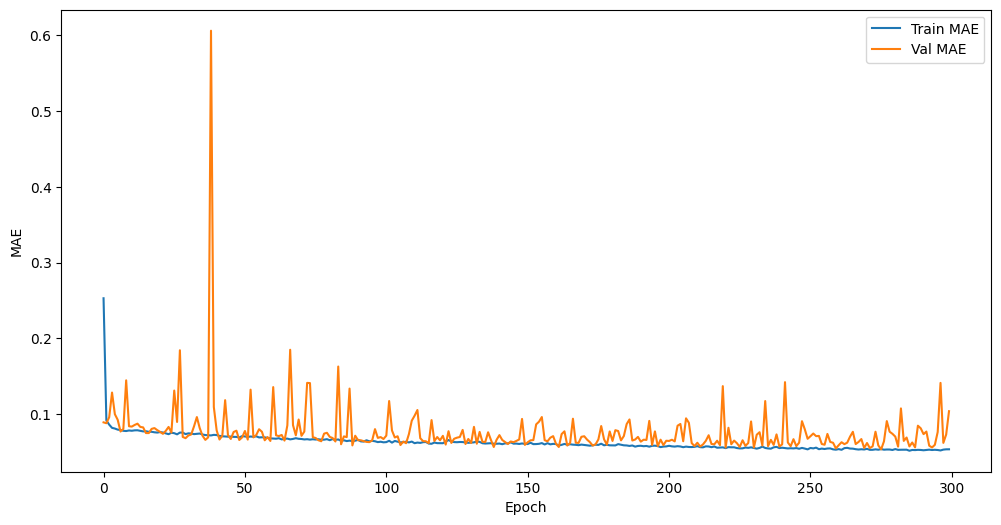

66/66 [==============================] - 0s 2ms/step - loss: 0.1036 - mae: 0.1036
Validation MAE: 0.10361789166927338
85/85 [==============================] - 0s 1ms/step
Submission file saved to C:/Users/mavsi/Documents/NN/Trabalho/Dados\submission1.csv


In [7]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define model
def build_model1(input_shape):
    
    model1 = Sequential([
        # First convolutional layer with 64 filters, kernel size of 3x3, padding 'same', and ReLU activation - extract features from the images
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(), # Stabilize Model Training
        MaxPooling2D((2, 2)), # Downsampling the image to reduce the number of parameters and computation in the network and hence to control overfitting
        Dropout(0.3), # Prevent overfitting
        
        # Second convolutional layer with 128 filters, kernel size of 3x3, padding 'same', and ReLU activation
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(), # Stabilize Model Training
        MaxPooling2D((2, 2)), # Downsampling the image to reduce the number of parameters and computation in the network and hence to control overfitting
        Dropout(0.3), # Prevent overfitting
        
        # Third convolutional layer with 256 filters, kernel size of 3x3, padding 'same', and ReLU activation
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(), # Stabilize Model Training
        MaxPooling2D((2, 2)), # Downsampling the image to reduce the number of parameters and computation in the network and hence to control overfitting
        Dropout(0.3), # Prevent overfitting

        # Flatten layer to convert 2D data to 1D
        Flatten(),

        # Fully connected dense layer with 512 units and ReLU activation
        Dense(512, activation='relu'),
        Dropout(0.3), #Prevent overfitting 

        # Fully connected dense layer with 256 units and ReLU activation
        Dense(256, activation='relu'),
        Dropout(0.3), #Prevent overfitting

        # Fully connected dense layer with 128 units and ReLU activation
        Dense(128, activation='relu'),
        Dropout(0.3), #Prevent overfitting

        # Output layer with 1 unit (for regression) default linear activation
        Dense(1)
    ])
    
    # Compile the model with the Adam optimizer
    model1.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
    
    '''Adam calculates a moving average of the first-order moments (the mean of gradients) 
    and the second-order moments (the uncentered variance of gradients) to scale the learning rates adaptively. 
    This makes it well-suited for problems with sparse gradients or noisy data.'''
    
    #R eturns model
    return model1

# Build the model
model1 = build_model1(x_train_images.shape[1:])
# Prints model summary info
model1.summary()

# Train-validation split: 80-20 ratio
x_train_split1, x_val_split1, y_train_split1, y_val_split1 = train_test_split(x_train_images, y_train, test_size=0.2, random_state=20)

# Define a custom callback for printing training progress after each epoch to track the model's performance during training
class trainingprogress(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs=None): 
        print(f"Epoch {epoch+1} completed. Loss: {logs['loss']:.4f}, MAE: {logs['mae']:.4f}, Val Loss: {logs['val_loss']:.4f}, Val MAE: {logs['val_mae']:.4f}")

# Train the model with the custom callback
history1 = model1.fit(x_train_split1, y_train_split1, epochs=300, batch_size=30, validation_data=(x_val_split1, y_val_split1), callbacks=[trainingprogress()]) 

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history1.history['mae'], label='Train MAE')
plt.plot(history1.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Model Evaluation
val_loss1, val_mae1 = model1.evaluate(x_val_split1, y_val_split1) # Evaluate the model on the validation data
print(f'Validation MAE: {val_mae1}') # Print the validation MAE

# Making Predictions and Preparing Submission
predictions = model1.predict(x_test_images)

# Prepare submission file
output_dir1 = 'Resultados'  # Specify the directory where to save the submission file
submission1 = pd.DataFrame({'id': test_df['id'], 'AOT_550': predictions.flatten()}) # Create a DataFrame with the ID and predictions
submission_file_path1 = os.path.join(output_dir1, 'submission1.csv') # Specify the path to save the submission file
submission1.to_csv(submission_file_path1, index=False) # Save the DataFrame to a CSV file without row numbers

print(f'Submission file saved to {submission_file_path1}') # Print the path to the submission file

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 19, 19, 64)        7552      
                                                                 
 batch_normalization_12 (Bat  (None, 19, 19, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 9, 9, 64)          0         
                                                                 
 conv2d_13 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 batch_normalization_13 (Bat  (None, 9, 9, 128)       

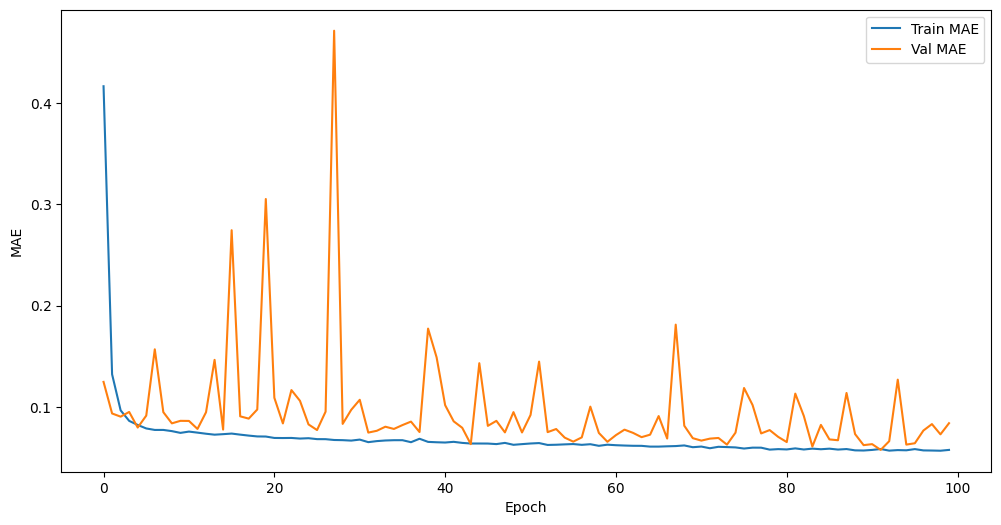

66/66 [==============================] - 0s 2ms/step - loss: 0.0840 - mae: 0.0840
Validation MAE: 0.0839511975646019
85/85 [==============================] - 0s 2ms/step
Submission file saved to C:/Users/mavsi/Documents/NN/Trabalho/Dados\submission2.csv


In [8]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define model
def build_model2(input_shape):
    
    model2 = Sequential([
        # First convolutional layer with 64 filters, kernel size of 3x3, padding 'same', and ReLU activation - extract features from the images
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(), # Stabilize Model Training
        MaxPooling2D((2, 2)), # Downsampling the image to reduce the number of parameters and computation in the network and hence to control overfitting
        Dropout(0.3), # Prevent overfitting
        
        # Second convolutional layer with 128 filters, kernel size of 3x3, padding 'same', and ReLU activation
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(), # Stabilize Model Training
        MaxPooling2D((2, 2)), # Downsampling the image to reduce the number of parameters and computation in the network and hence to control overfitting
        Dropout(0.3), # Prevent overfitting
        
        # Third convolutional layer with 256 filters, kernel size of 3x3, padding 'same', and ReLU activation
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(), # Stabilize Model Training
        MaxPooling2D((2, 2)), # Downsampling the image to reduce the number of parameters and computation in the network and hence to control overfitting
        Dropout(0.3), # Prevent overfitting

        # Flatten layer to convert 2D data to 1D
        Flatten(),

        # Fully connected dense layer with 512 units and ReLU activation
        Dense(512, activation='relu'),
        Dropout(0.3), #Prevent overfitting 

        # Fully connected dense layer with 256 units and ReLU activation
        Dense(256, activation='relu'),
        Dropout(0.3), #Prevent overfitting

        # Fully connected dense layer with 128 units and ReLU activation
        Dense(128, activation='relu'),
        Dropout(0.3), #Prevent overfitting

        # Output layer with 1 unit (for regression) default linear activation
        Dense(1)
    ])
    
    # Compile the model with the Adam optimizer
    model2.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
    
    '''Adam calculates a moving average of the first-order moments (the mean of gradients) 
    and the second-order moments (the uncentered variance of gradients) to scale the learning rates adaptively. 
    This makes it well-suited for problems with sparse gradients or noisy data.'''
    
    #R eturns model
    return model2

# Build the model
model2 = build_model2(x_train_images.shape[1:])
# Prints model summary info
model2.summary()

# Train-validation split: 80-20 ratio
x_train_split2, x_val_split2, y_train_split2, y_val_split2 = train_test_split(x_train_images, y_train, test_size=0.2, random_state=20)

# Define a custom callback for printing training progress after each epoch to track the model's performance during training
class trainingprogress(tf.keras.callbacks.Callback): 
    def on_epoch_end2(self, epoch, logs=None): 
        print(f"Epoch {epoch+1} completed. Loss: {logs['loss']:.4f}, MAE: {logs['mae']:.4f}, Val Loss: {logs['val_loss']:.4f}, Val MAE: {logs['val_mae']:.4f}")

# Train the model with the custom callback
history2 = model2.fit(x_train_split2, y_train_split2, epochs=100, batch_size=100, validation_data=(x_val_split2, y_val_split2), callbacks=[trainingprogress()]) 

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history2.history['mae'], label='Train MAE')
plt.plot(history2.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Model Evaluation
val_loss2, val_mae2 = model2.evaluate(x_val_split2, y_val_split2) # Evaluate the model on the validation data
print(f'Validation MAE: {val_mae2}') # Print the validation MAE

# Making Predictions and Preparing Submission
predictions2 = model2.predict(x_test_images)

# Prepare submission file
output_dir2 = 'Resultados'  # Specify the directory where to save the submission file
submission2 = pd.DataFrame({'id': test_df['id'], 'AOT_550': predictions2.flatten()}) # Create a DataFrame with the ID and predictions
submission_file_path2 = os.path.join(output_dir2, 'submission2.csv') # Specify the path to save the submission file
submission2.to_csv(submission_file_path2, index=False) # Save the DataFrame to a CSV file without row numbers

print(f'Submission file saved to {submission_file_path2}') # Print the path to the submission file

## Discussion on the Models Outputs

The objective was to build and submit models capable of estimating the Aerosol Optical Thickness (AOT) at 550 nm for a specific location using Sentinel-2 images. Here we compare and discuss the results of two different model configurations:

### Model 1 - Submission 1

**Validation MAE obtained:** 0.0560 (the values may differ because the models code had to be run again)

#### Observations:

**Training Curve:**  
The first training curve indicates a decrease in Mean Absolute Error (MAE) over 300 epochs. This suggests that the model effectively learns and improves its predictions over a more extended training period.

**Validation Curve:**  
The validation MAE exhibits fluctuations but shows a general trend of decreasing. This variability could indicate some overfitting as the model might be capturing noise in the training data over such a long training duration.

### Model 2 - Submission 2

**Validation MAE obtained:** 0.0676 (the values may differ because the models code had to be run again)
#### Observations:

**Training Curve:**  
The training MAE decreases steadily suggesting that the model is learning effectively.

**Validation Curve:**  
The validation MAE shows more significant fluctuations than the first submission. The larger batch size of 100 might be causing the model to converge faster but it might also be missing out on finer details that smaller batches could capture.

## Results Discussion

When comparing the two different submissions, we noticed some differences in how they performed and were trained. The first submission achieved a MAE of 0.0560, which means it had better accuracy on new unseen data compared to the second submission which had a validation MAE of 0.0676. This suggests that the first model was generally more effective in making predictions on the test dataset data.

The first model underwent a longer training process of 300 epochs and it used smaller batches of 30 at a time. This slower, more detailed approach likely allowed the model to capture more subtle patterns in the data, leading to its better performance in validation. In contrast, the second model was trained for only 100 epochs and used larger batches of 100. While this sped up the training process, it may have caused the model to miss some of the details in the dataset. This could explain why its validation MAE was slightly higher.

Another observation was how unstable each model's validation MAE values were during training. The first model showed some higher fluctuations in its validation MAE over time which could suggest it was occasionally overfitting the data. However, despite these fluctuations, it consistently performed better overall. The second model, even with a higher batch size, also a lot of fluctuations on the MAE validation, indicating it might not have had enough time to fully stabilize its learning process.

## Conclusion

In conclusion, the choice of epochs and batch size significantly impacts the model's performance. While the first model trained for more epochs and with a smaller batch size yielded better results, it also showed signs of overfitting. The second model, with fewer epochs and a larger batch size, was trained faster but had a slightly higher validation MAE.

Unfortunately, since we didn’t start this project with the needed time and even though we only made two submissions, we surpassed a lot of obstacles during this project, since the configuration of python with “tensorflow” that required an older python version and “miniconda” to utilize the GPU to make the calculations, to the data preprocessing phase that during the majority of the time was giving us test MAE values in the best of cases of 3 and we didn’t find that the problem was the way we were extracting the AOT values until a couple of hours before the submission timeline. This last setback was the cause of us only making two submissions and we didn’t submit the other architectures tested for our design and even other model parameters and experimental iterations that could be relevant to discuss, learn and obtain a deeper understanding of the whole process of building a model.

Even with this partially successful experimentation and exploration of a model building process, the whole project served as a good teaching tool for us as our first model building process from start to finish and helped to acquire a better understanding of the impact of different training configurations and guides adjustments to improve future models.
